# Check whether this thing is working

In [ ]:
"Hello World"

'Hello World'

# DNA Framework

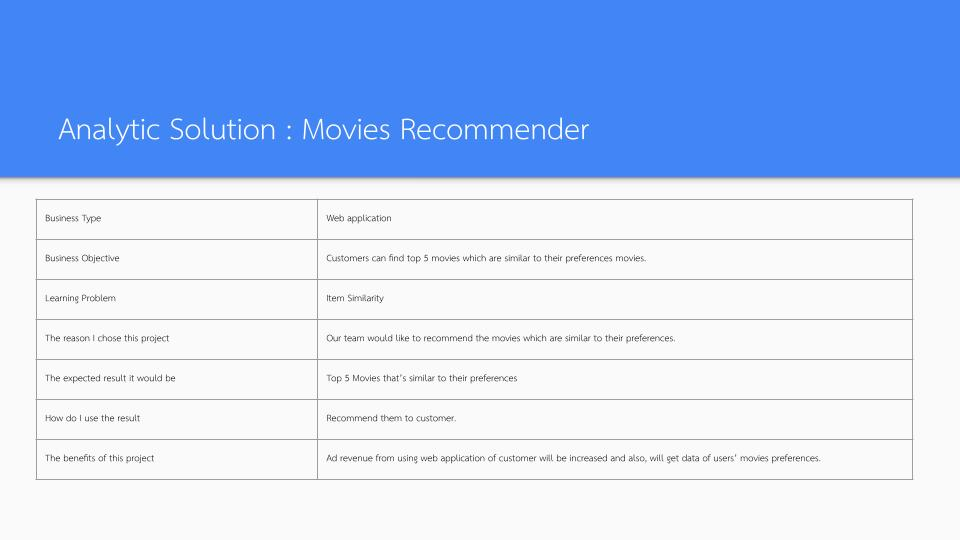

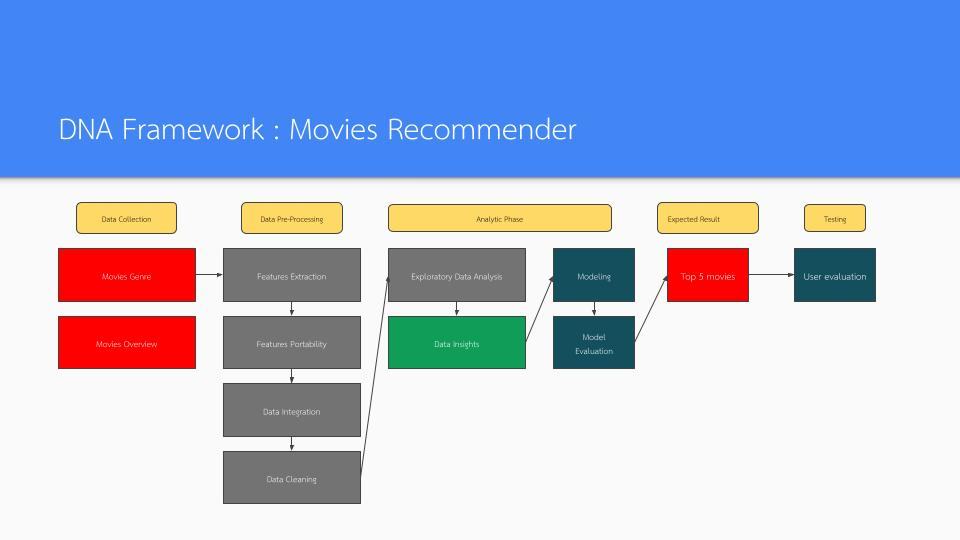

# Import libraries

In [ ]:
import numpy
import seaborn as sns
import matplotlib as plt
import re
import sklearn
import pandas as pd

# Import Dataset



In [ ]:
movies = pd.read_csv('movies_metadata.csv')
movies_pipe_line = movies.copy()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data pre-processing

In [ ]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
movies.duplicated().sum()

13

In [ ]:
movies.drop_duplicates(inplace=True)

In [ ]:
movies.reset_index()

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45448,45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45449,45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45450,45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45451,45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
movies.duplicated().sum()

0

## To see that how do the NA columns look like

In [ ]:
movies.isna().sum()

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
#Check null first
movies.loc[movies['homepage'].isnull()].head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [ ]:
#check not null
movies.loc[movies['homepage'].notnull()].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
24,False,NaN,3600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",...,1995-10-27,49800000.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,I Love You... The Way You Are.,Leaving Las Vegas,False,7.1,365.0
46,False,NaN,33000000,"[{'id': 80, 'name': 'Crime'}, {'id': 9648, 'na...",http://www.sevenmovie.com/,807,tt0114369,en,Se7en,Two homicide detectives are on a desperate hun...,...,1995-09-22,327311859.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Seven deadly sins. Seven ways to die.,Se7en,False,8.1,5915.0
49,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629,tt0114814,en,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin...",...,1995-07-19,23341568.0,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,False,8.1,3334.0


In [ ]:
# We already know that HomePage column is just a hompage of each movies
# Out objective is to recommend movies to user so, homepage isn't that neccessary
# How about drop the column?
# Yes of course that's a great idea
# but we must first create another dataFrame so, we won't end up like s*** if we f***ed up
df = movies.copy()

In [ ]:
#dropping
df.drop('homepage', axis='columns', inplace=True)

In [ ]:
#check if it's dropped
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# it's gone so let's check another columns
df.isna().sum()

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
#the next column that we'll inspect will be belong_to_collection one
#check whether how much is it to the whole count of dataset
len(df.loc[df['belongs_to_collection'].isnull()]) * 100 / df.shape[0]

90.11286383737047

In [ ]:
#it's almost 100% holy s***
#so I wonder how about another null columns?
(df.isna().sum() * 100 / df.shape[0]).round(2)

adult                     0.00
belongs_to_collection    90.11
budget                    0.00
genres                    0.00
id                        0.00
imdb_id                   0.04
original_language         0.02
original_title            0.00
overview                  2.10
popularity                0.01
poster_path               0.85
production_companies      0.01
production_countries      0.01
release_date              0.19
revenue                   0.01
runtime                   0.58
spoken_languages          0.01
status                    0.19
tagline                  55.10
title                     0.01
video                     0.01
vote_average              0.01
vote_count                0.01
dtype: float64

In [ ]:
#there are two columns that're above 50%
#dropping
df.drop('belongs_to_collection', axis='columns', inplace=True)

In [ ]:
df.drop('tagline', axis='columns', inplace=True)

In [ ]:
#check
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
#let's move to the next one
#overview
df.loc[df['overview'].isnull()]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
32,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,0.745542,/k6ODtR38dKEfuzSGjggr8KDyAF4.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1996-09-18,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Wings of Courage,False,6.8,4.0
300,False,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",161495,tt0114296,sv,Roommates,NaN,3.39587,/hvHNlMvWS2GBt7RR971bJ3k4bJc.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-03-01,12400000.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Roommates,False,6.4,7.0
634,False,0,"[{'id': 35, 'name': 'Comedy'}]",287305,tt0117312,de,Peanuts – Die Bank zahlt alles,NaN,0.066123,/wpk30SvRHmjC2plgKHZXxG0FlKd.jpg,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1996-03-21,0.0,NaN,[],Released,Peanuts – Die Bank zahlt alles,False,4.0,1.0
635,False,0,"[{'id': 35, 'name': 'Comedy'}]",339428,tt0116485,de,Happy Weekend,NaN,0.002229,NaN,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1996-03-14,65335.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,Happy Weekend,False,0.0,0.0
641,False,0,"[{'id': 35, 'name': 'Comedy'}]",10801,tt0117788,de,Das Superweib,NaN,0.821299,/AbhMKCh3fV5PY2B9uSPF1DWEvq2.jpg,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1996-03-06,0.0,86.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,The Superwife,False,5.3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45342,False,0,"[{'id': 18, 'name': 'Drama'}]",199887,tt1771636,en,Over/Under,NaN,0.704642,/1xLaIBGGPE4APtBJdfeuyOWICZ0.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-01-04,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Over/Under,False,4.0,2.0
45377,False,0,"[{'id': 12, 'name': 'Adventure'}]",317389,tt0070695,es,Simbad e il califfo di Bagdad,NaN,0.006352,/izk7KbT6LZO9baEhCkOZYMgj60w.jpg,...,"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1973-07-22,0.0,NaN,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,Simbad e il califfo di Bagdad,False,0.0,0.0
45398,False,1254040,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,tt5742932,fi,Lauri Mäntyvaaran tuuheet ripset,NaN,0.347806,/rKOpJuwb7pTqYVShHM2tl25VxyF.jpg,...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2017-07-28,0.0,90.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Thick Lashes of Lauri Mäntyvaara,False,8.0,1.0
45399,False,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,tt3805180,ru,Все и сразу,NaN,0.201582,/hNsmPpl3zLG36jr4EIEd5P8I4pa.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2014-06-05,3.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,All at Once,False,6.0,4.0


In [ ]:
#it's neccesary to have overview, it represents as a short version of the movie
#so I decided to drop the NaN rows
df.dropna(axis='rows', inplace=True)

In [ ]:
df.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [ ]:
df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


In [ ]:
#rename genres of each movies
regex = re.compile(r": '(.*?)'")
df['genres'] = df['genres'].apply(lambda x: ",".join(regex.findall(x)))
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,"Drama,Action,Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45463,False,0,"Action,Drama,Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45464,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [ ]:
#reset index
df.reset_index(drop=True)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44030,False,0,"Drama,Action,Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Robin Hood,False,5.7,26.0
44031,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
44032,False,0,"Action,Drama,Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
44033,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [ ]:
#rename production names and production countries
df['production_companies'] = df['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
df['production_countries'] = df['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))

In [ ]:
#rename spoken langs
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

In [ ]:
#check
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"US, United States of America",1995-10-30,373554033.0,81.0,"en, English",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"US, United States of America",1995-12-15,262797249.0,104.0,"en, English, fr, Français",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"US, United States of America",1995-12-22,0.0,101.0,"en, English",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"US, United States of America",1995-12-22,81452156.0,127.0,"en, English",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"US, United States of America",1995-02-10,76578911.0,106.0,"en, English",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,"Drama,Action,Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"CA, Canada, DE, Germany, GB, United Kingdom, U...",1991-05-13,0.0,104.0,"en, English",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"PH, Philippines",2011-11-17,0.0,360.0,"tl,",Released,Century of Birthing,False,9.0,3.0
45463,False,0,"Action,Drama,Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"US, United States of America",2003-08-01,0.0,90.0,"en, English",Released,Betrayal,False,3.8,6.0
45464,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"RU, Russia",1917-10-21,0.0,87.0,,Released,Satan Triumphant,False,0.0,0.0


In [ ]:
df.loc[df['genres'] == 'Science Fiction']

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
170,False,90000000,Science Fiction,9482,tt0113492,en,Judge Dredd,"In a dystopian future, Dredd, the most famous ...",8.18481,/r17S4XlQ3Jq5U1KRovFUwU8P4aG.jpg,...,"US, United States of America",1995-06-30,113493481.0,96.0,"en, English",Released,Judge Dredd,False,5.4,643.0
663,False,9000000,Science Fiction,8069,tt0062711,en,Barbarella,"In the far future, a highly sexual woman is ta...",14.3042,/fntrx2BzHkdSNFe5jkgP09XsK7g.jpg,...,"US, United States of America",1968-10-10,2500000.0,98.0,"en, English",Released,Barbarella,False,5.7,149.0
1638,False,0,Science Fiction,438108,tt0128755,en,Time Tracers,When the discovery of a five-thousand year old...,0.001247,/tU52aw3QwOV2a7zD4T659iAKGwr.jpg,...,"US, United States of America",1997-12-16,0.0,101.0,"en, English",Released,Time Tracers,False,0.0,0.0
1684,False,75000000,Science Fiction,10153,tt0120184,en,Sphere,The OSSA discovers a spacecraft thought to be ...,7.12474,/jrjzPjKnpJq99GPePKf64k7Fzqh.jpg,...,"US, United States of America",1998-02-13,13100000.0,134.0,"en, English",Released,Sphere,False,5.8,483.0
2583,False,0,Science Fiction,67067,tt0120554,en,Zone 39,In a time of misery and fear two enemies come ...,0.087065,/5VMuNPqKhc0gEH0HyVxgjUXAgs9.jpg,...,"AU, Australia",1996-05-04,0.0,95.0,"en, English",Released,Zone 39,False,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45069,False,0,Science Fiction,401427,tt5769236,en,Elegy,"In the future, nature has evolved to destroy h...",0.016472,/wcq1a3heYgd8TOuctso0c3Pk4wx.jpg,...,,2014-09-10,0.0,16.0,,Released,Elegy,False,0.0,0.0
45075,False,0,Science Fiction,314238,tt1899268,en,Plug,"On a post-apocalyptic Earth, Leila Dawn (Natal...",0.495194,/3Sa0PaFHLQWe3q60sNOXCb4RkbB.jpg,...,"US, United States of America",2014-10-25,0.0,16.0,"en, English",Released,Plug,False,5.6,5.0
45183,False,0,Science Fiction,429101,tt4881364,en,Anti Matter,Anti Matter (AKA Worm) is a sci-fi noir take o...,4.57264,/fQq24L8ioUy3cHWPo8LheguicxF.jpg,...,"GB, United Kingdom",2016-01-01,0.0,109.0,,Released,Anti Matter,False,6.7,22.0
45367,False,0,Science Fiction,449696,tt0105492,en,The Stranger: Summoned by Shadows,Wearied by his travels through time and space ...,3.5e-05,/aWnsJwOZB1ARhavpnh0O5ae8qWn.jpg,...,"GB, United Kingdom",1991-01-01,0.0,34.0,"en, English",Released,The Stranger: Summoned by Shadows,False,0.0,0.0


In [ ]:
#rename genres so it can be fit into model
mapping = {'Science Fiction':'SciFi', 'Animation, Comedy, Family':'Animation', 'Adventure, Fantasy, Family':"Adventure", "Comedy, Drama, Romance":'Comedy'}
df['genres'] = df['genres'].replace(mapping, regex=True)
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"US, United States of America",1995-10-30,373554033.0,81.0,"en, English",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"US, United States of America",1995-12-15,262797249.0,104.0,"en, English, fr, Français",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"US, United States of America",1995-12-22,0.0,101.0,"en, English",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"US, United States of America",1995-12-22,81452156.0,127.0,"en, English",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"US, United States of America",1995-02-10,76578911.0,106.0,"en, English",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,"Drama,Action,Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"CA, Canada, DE, Germany, GB, United Kingdom, U...",1991-05-13,0.0,104.0,"en, English",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"PH, Philippines",2011-11-17,0.0,360.0,"tl,",Released,Century of Birthing,False,9.0,3.0
45463,False,0,"Action,Drama,Thriller",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"US, United States of America",2003-08-01,0.0,90.0,"en, English",Released,Betrayal,False,3.8,6.0
45464,False,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"RU, Russia",1917-10-21,0.0,87.0,,Released,Satan Triumphant,False,0.0,0.0


In [ ]:
df.loc[df['genres'] == 'SciFi']

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
170,False,90000000,SciFi,9482,tt0113492,en,Judge Dredd,"In a dystopian future, Dredd, the most famous ...",8.18481,/r17S4XlQ3Jq5U1KRovFUwU8P4aG.jpg,...,"US, United States of America",1995-06-30,113493481.0,96.0,"en, English",Released,Judge Dredd,False,5.4,643.0
663,False,9000000,SciFi,8069,tt0062711,en,Barbarella,"In the far future, a highly sexual woman is ta...",14.3042,/fntrx2BzHkdSNFe5jkgP09XsK7g.jpg,...,"US, United States of America",1968-10-10,2500000.0,98.0,"en, English",Released,Barbarella,False,5.7,149.0
1638,False,0,SciFi,438108,tt0128755,en,Time Tracers,When the discovery of a five-thousand year old...,0.001247,/tU52aw3QwOV2a7zD4T659iAKGwr.jpg,...,"US, United States of America",1997-12-16,0.0,101.0,"en, English",Released,Time Tracers,False,0.0,0.0
1684,False,75000000,SciFi,10153,tt0120184,en,Sphere,The OSSA discovers a spacecraft thought to be ...,7.12474,/jrjzPjKnpJq99GPePKf64k7Fzqh.jpg,...,"US, United States of America",1998-02-13,13100000.0,134.0,"en, English",Released,Sphere,False,5.8,483.0
2583,False,0,SciFi,67067,tt0120554,en,Zone 39,In a time of misery and fear two enemies come ...,0.087065,/5VMuNPqKhc0gEH0HyVxgjUXAgs9.jpg,...,"AU, Australia",1996-05-04,0.0,95.0,"en, English",Released,Zone 39,False,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45069,False,0,SciFi,401427,tt5769236,en,Elegy,"In the future, nature has evolved to destroy h...",0.016472,/wcq1a3heYgd8TOuctso0c3Pk4wx.jpg,...,,2014-09-10,0.0,16.0,,Released,Elegy,False,0.0,0.0
45075,False,0,SciFi,314238,tt1899268,en,Plug,"On a post-apocalyptic Earth, Leila Dawn (Natal...",0.495194,/3Sa0PaFHLQWe3q60sNOXCb4RkbB.jpg,...,"US, United States of America",2014-10-25,0.0,16.0,"en, English",Released,Plug,False,5.6,5.0
45183,False,0,SciFi,429101,tt4881364,en,Anti Matter,Anti Matter (AKA Worm) is a sci-fi noir take o...,4.57264,/fQq24L8ioUy3cHWPo8LheguicxF.jpg,...,"GB, United Kingdom",2016-01-01,0.0,109.0,,Released,Anti Matter,False,6.7,22.0
45367,False,0,SciFi,449696,tt0105492,en,The Stranger: Summoned by Shadows,Wearied by his travels through time and space ...,3.5e-05,/aWnsJwOZB1ARhavpnh0O5ae8qWn.jpg,...,"GB, United Kingdom",1991-01-01,0.0,34.0,"en, English",Released,The Stranger: Summoned by Shadows,False,0.0,0.0


In [ ]:
#check whether renamed columns are null or not
df.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
poster_path             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64

In [ ]:
#Dropping rows that don't contain type
df.drop(df.loc[df['genres'] == ""].index, inplace=True)

In [ ]:
# #Change movies that have multiple genres into only one genre
# df.loc[df['genres'].str.len() > 12, 'genres'] = "MultipleType"

In [ ]:
df

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"Animation,Comedy,Family",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"US, United States of America",1995-10-30,373554033.0,81.0,"en, English",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"Adventure,Fantasy,Family",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"US, United States of America",1995-12-15,262797249.0,104.0,"en, English, fr, Français",Released,Jumanji,False,6.9,2413.0
2,False,0,"Romance,Comedy",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"US, United States of America",1995-12-22,0.0,101.0,"en, English",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"Comedy,Drama,Romance",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"US, United States of America",1995-12-22,81452156.0,127.0,"en, English",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,Comedy,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"US, United States of America",1995-02-10,76578911.0,106.0,"en, English",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,False,0,Horror,289923,tt0252966,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.38645,/lXtoHVdej6kS1Dc7KAhw05sMos9.jpg,...,"US, United States of America",2000-10-03,0.0,30.0,"en, English",Released,The Burkittsville 7,False,7.0,1.0
45459,False,0,SciFi,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,...,"US, United States of America",1995-01-01,0.0,85.0,"en, English",Released,Caged Heat 3000,False,3.5,1.0
45460,False,0,"Drama,Action,Romance",30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,"CA, Canada, DE, Germany, GB, United Kingdom, U...",1991-05-13,0.0,104.0,"en, English",Released,Robin Hood,False,5.7,26.0
45462,False,0,Drama,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"PH, Philippines",2011-11-17,0.0,360.0,"tl,",Released,Century of Birthing,False,9.0,3.0


In [ ]:
df['title'] = df['title'].drop_duplicates()

# EDA

In [ ]:
###Visualization
import matplotlib.pyplot as plt

def similarMovies(movieName):
    movie_sim = df.loc[df['title'] == movieName]
    tmp = movie_sim['genres'].values
    a = tmp[0].split(',')

    return a



##Check movies which the most similar with Jumanji

In [ ]:
getSim = similarMovies('Robin Hood')
getSim

['Animation', 'Family']

Text(0, 0.5, 'Vote Average')

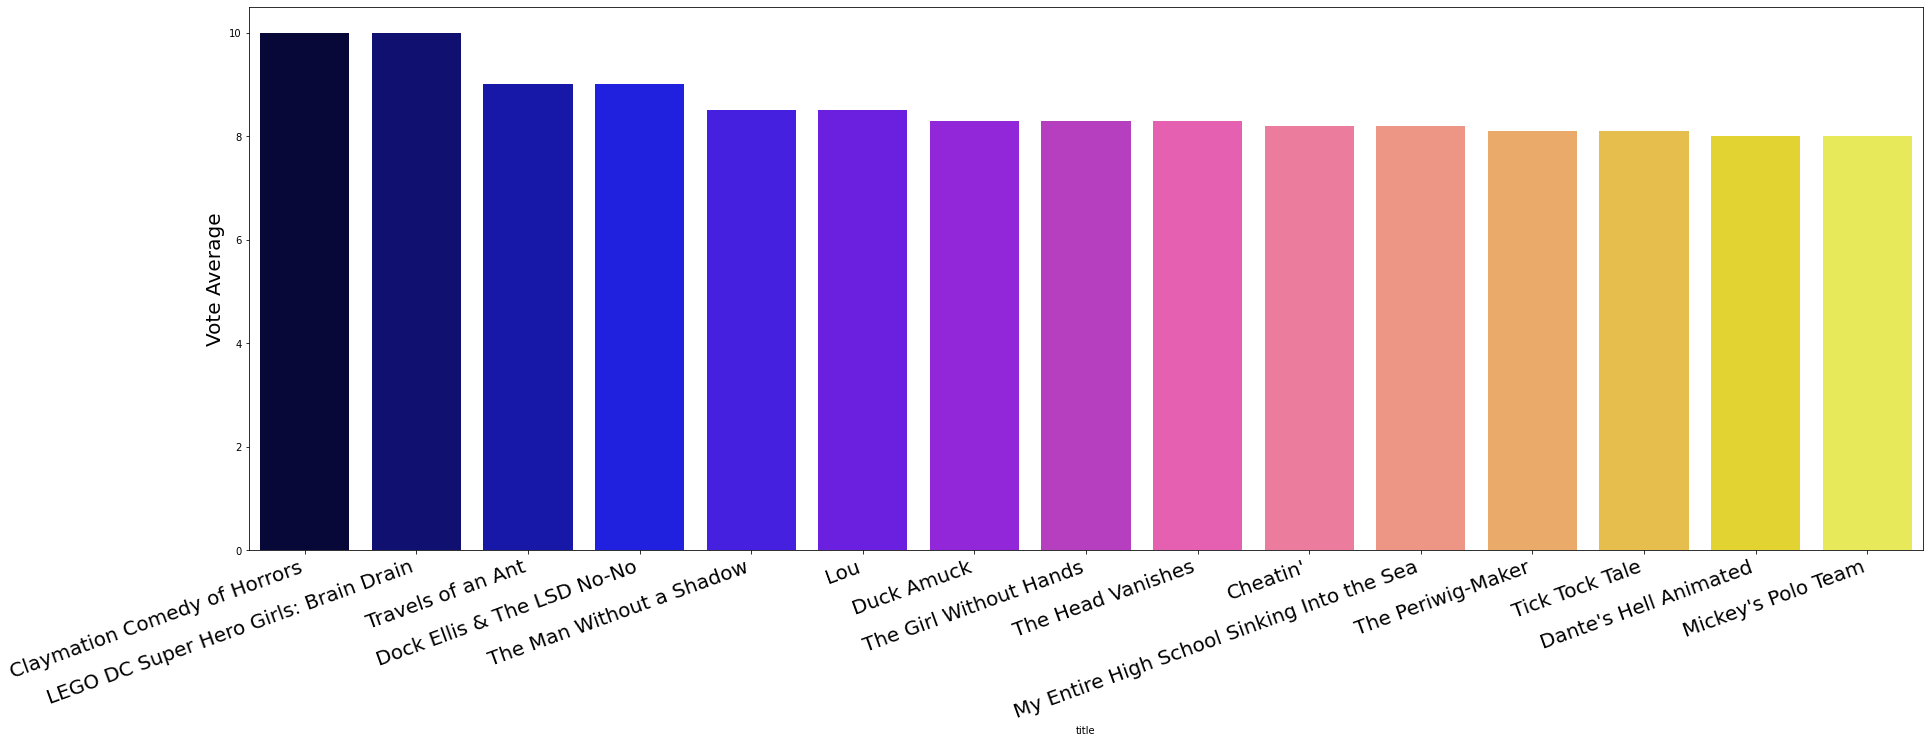

In [ ]:
similarMovie = df.loc[(df['genres'] == getSim[0]) | (df['genres'] == getSim[1])]
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=similarMovie.nlargest(15,'vote_average'), x='title', y='vote_average', palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=20, ha="right")
ax.set_ylabel('Vote Average', fontsize=20)

In [ ]:
def countgenre(data):
  dicts = {}
  for x in data:
    for y in x:
      if y not in dicts.keys():
        dicts[y] = 0
      dicts[y] = int(dicts[y])+1
  return dicts

In [ ]:
GENRE = df['genres'].str.split(",")
GENRE = countgenre(GENRE)

In [ ]:
colGenre = pd.DataFrame(data=GENRE.keys(),columns=['genres'])
rowGenre = pd.DataFrame(data=GENRE.values(),columns=['count_genre'])
colGenre.reset_index(inplace=True)
rowGenre.reset_index(inplace=True)
Genre = pd.merge(colGenre,rowGenre,on=['index','index'])
# create count genres dataframe for checking value count each genres

Text(0, 0.5, 'Count Genres')

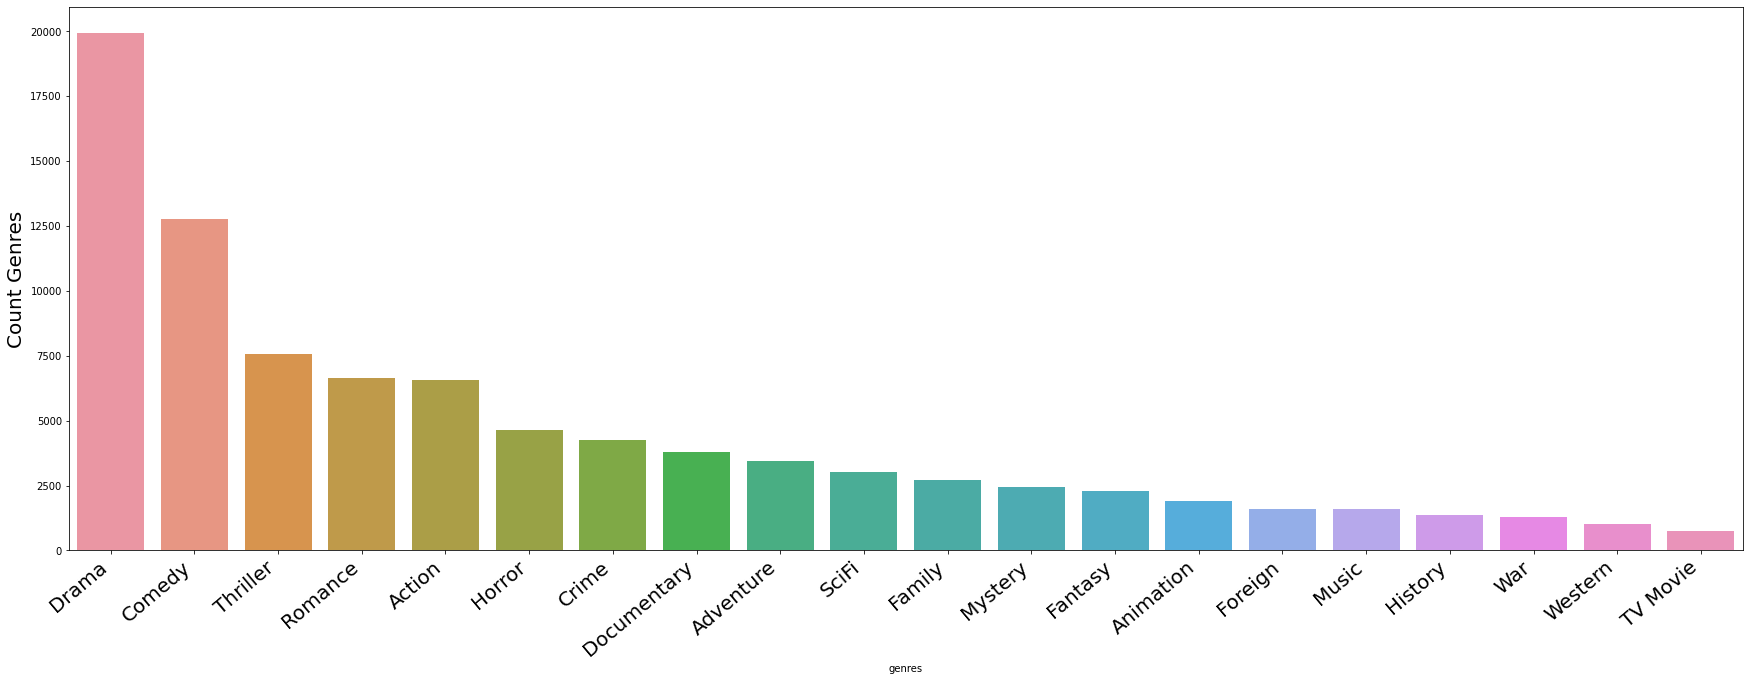

In [ ]:
### mostly movies genre
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=Genre.nlargest(32,'count_genre'), x='genres', y='count_genre' )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=40, ha="right")
ax.set_ylabel('Count Genres', fontsize=20)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


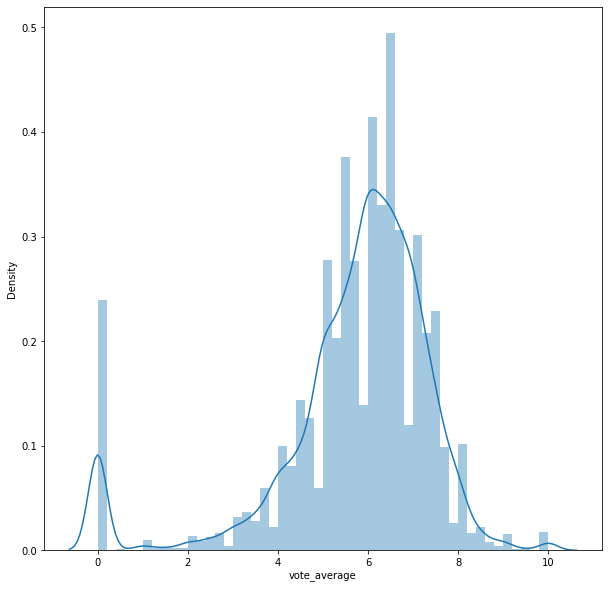

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['vote_average']);
#check the voting period

In [ ]:
data_task = df.original_language.value_counts().head(20)
data_task = pd.DataFrame({"Language" : data_task.index, "Count" : data_task}).reset_index(drop = True)
data_task

,Language,Count
0,en,30329
1,fr,2213
2,ja,1284
3,it,1181
4,de,926
5,es,874
6,ru,756
7,hi,476
8,ko,431
9,zh,389


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

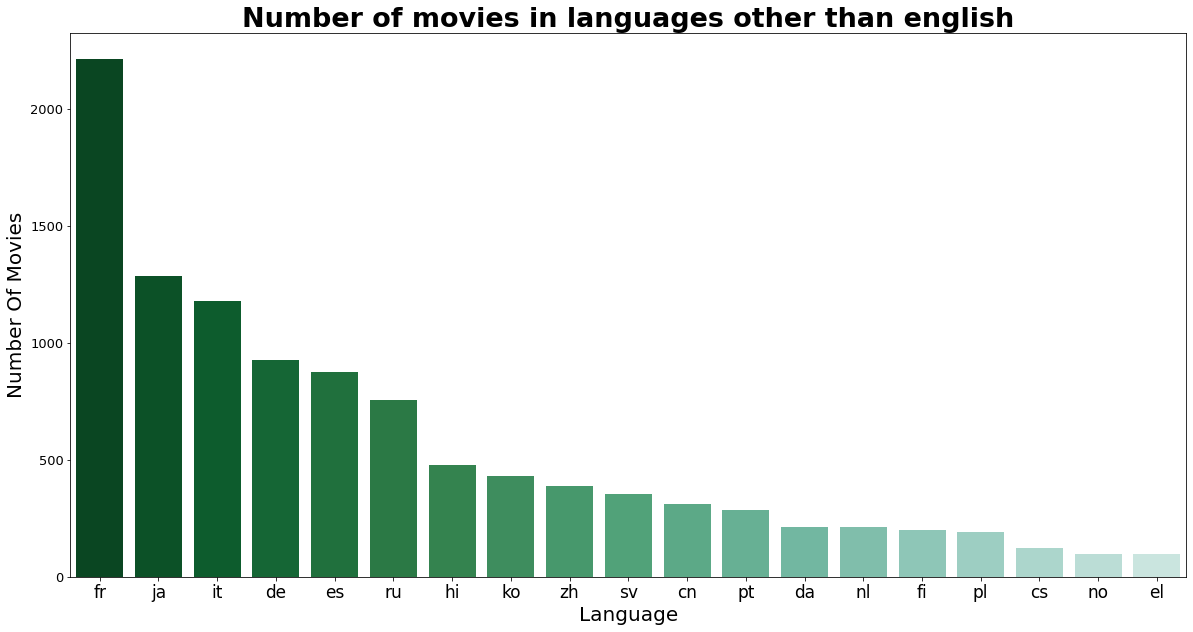

In [ ]:
#check other languages without eng
plt.figure(figsize = (20, 10))
plt.title("Number of movies in languages other than english", fontsize = 27, fontweight = 'bold')

sns.barplot(x = data_task.loc[(data_task.Language != 'en'), 'Language'] ,
            y = data_task.loc[(data_task.Language != 'en'), 'Count'],
           palette = sns.color_palette("BuGn_r", 25))

plt.xlabel('Language', fontsize = 20)
plt.ylabel('Number Of Movies', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 13)

In [ ]:
check_adult = df.adult.value_counts()
adult_df = pd.DataFrame({"adult" : check_adult.index, "adult_count" : check_adult}).reset_index(drop = True)
adult_df

,adult,adult_count
0,False,42061
1,True,8


In [ ]:
adult_df['adult'] = adult_df['adult'].apply(lambda x: 'Kid' if x == 'False' else 'Adult')
adult_df

,adult,adult_count
0,Kid,42061
1,Adult,8


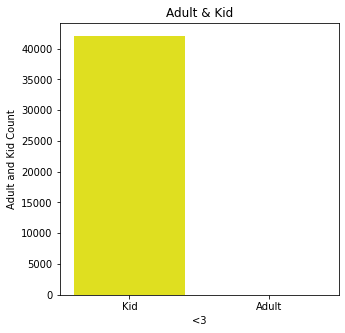

In [ ]:
plt.figure(figsize = (5, 5))
sns.barplot(data=adult_df, x='adult', y='adult_count',color="yellow")
plt.ylabel("Adult and Kid Count")
plt.xlabel("<3")
plt.title("Adult & Kid");

# Feature Engineering
## What feature should I decide to give the model to train itself to be predicting a similarity movie?
    1. Genre
    2. Overview
    4. imdb score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

### Combining features

In [ ]:
def combining_features(row):
    return row['genres'] + " " + row['overview']

In [ ]:
df['combining_features'] = df.apply(combining_features, axis=1)

# Modeling
## Decide by time it spends to train
    We have got 4 choices which are 
        1. CountVectorizer with linear_kernel
        2. CountVectorizer with Cosine_similarity
        3. TfidfVectorizer with linear_kernel
        4. TfidfVectorizer with cosine_similarity

### CountVectorizer with Linear_Kernel
    this dude takes 0.1 sec for generating @vector 
    and another 17.9 secs for generating @item_similarity

In [ ]:
vector = CountVectorizer().fit_transform(df['combining_features'])

In [ ]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'combining_features'],
      dtype='object')

In [ ]:
item_similarity = linear_kernel(vector)

### CountVectorizer With Cosine_Similarity
    it spends 18.2 seconds according to the timer in the below of the cell
    this dude is the 2nd runner up for the fastest algorithm

In [ ]:
# vector = CountVectorizer().fit_transform(df['genres'])
# item_similarity = cosine_similarity(vector)

### TfidfVectorizer with Linear_Kernel
    20.2 secs for this one

In [ ]:
# vector = TfidfVectorizer(stop_words='english').fit_transform(df['genres'])
# item_similarity = linear_kernel(vector)

### TfidfVectorizer with Cosine_similarity
    20.4 seconds

In [ ]:
# vector = TfidfVectorizer(stop_words='english').fit_transform(df['genres'])
# item_similarity = cosine_similarity(vector)

### Summary
    1. CountVectorizer with linear_kernel 18.0 secs 
    2. CountVectorizer with Cosine_similarity 18.2 secs
    3. TfidfVectorizer with linear_kernel 20.2 secs 
    4. TfidfVectorizer with cosine_similarity 20.4 secs

    ALGORITHM HAS BEEN SELECTED, IT'S CountVectorizer with linear_kernel WITH IT'S FASTEST CALCULATION TIME 18.0 secs 

## Show similar movies

In [ ]:
# giving a dummy of user's movie
dummy = "Jumanji"

#getting index of movie from extraction features array
def get_index(dummy):
    return df[df['title'] == dummy].index.values[0]

movies_index = get_index(dummy)

In [ ]:
movies_index

1

In [ ]:
# Generating similar movies to dummy
similar_movies = list(enumerate(item_similarity[movies_index]))

In [ ]:
# sorting 
sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)

In [ ]:
sorted_similar_movies

[(30135, 126.0),
 (3354, 105.0),
 (13265, 103.0),
 (17926, 103.0),
 (5401, 102.0),
 (22084, 102.0),
 (21106, 101.0),
 (12625, 99.0),
 (18501, 99.0),
 (39354, 99.0),
 (37134, 98.0),
 (40996, 98.0),
 (18199, 97.0),
 (28860, 97.0),
 (37628, 97.0),
 (10680, 96.0),
 (17637, 96.0),
 (27864, 96.0),
 (8627, 94.0),
 (12202, 94.0),
 (15675, 94.0),
 (23483, 94.0),
 (28050, 94.0),
 (36794, 94.0),
 (9647, 93.0),
 (14659, 93.0),
 (16529, 93.0),
 (17889, 93.0),
 (31371, 93.0),
 (32733, 93.0),
 (7137, 92.0),
 (14105, 92.0),
 (19302, 92.0),
 (25319, 92.0),
 (31084, 92.0),
 (36058, 92.0),
 (37205, 92.0),
 (39647, 92.0),
 (40058, 92.0),
 (8666, 91.0),
 (16947, 91.0),
 (19195, 91.0),
 (27958, 91.0),
 (29356, 91.0),
 (35584, 91.0),
 (40515, 91.0),
 (13797, 90.0),
 (14240, 90.0),
 (30133, 90.0),
 (33294, 90.0),
 (33409, 90.0),
 (36729, 90.0),
 (1, 89.0),
 (33188, 89.0),
 (36628, 89.0),
 (1921, 88.0),
 (14376, 88.0),
 (16553, 88.0),
 (17234, 88.0),
 (22873, 88.0),
 (26851, 88.0),
 (30163, 88.0),
 (31087, 88.

In [ ]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'combining_features'],
      dtype='object')

In [ ]:
# it returns an array of index of movies and its score
# so we have to find what is the index represents the title of the movie
similar_movies_arr = []
score = []
def get_title(index):
    return df.loc[df.index == index]['title'].values[0]
for i in range(1, 6):
    similar_movies_arr.append(get_title(index = sorted_similar_movies[i][0]))
    score.append(sorted_similar_movies[i][1])


In [ ]:
similar_movies_arr

['Retroactive',
 'High and Dizzy',
 'Brothers at War',
 'How I Killed My Father',
 'Bells of Capistrano']

In [ ]:
score

[105.0, 103.0, 103.0, 102.0, 102.0]

In [ ]:
for j in range(len(similar_movies_arr)):
    print(f'Movie name = {similar_movies_arr[j]} | Matching score = {(score[j] * 0.01).round(2)}')

Movie name = Retroactive | Matching score = 1.05
Movie name = High and Dizzy | Matching score = 1.03
Movie name = Brothers at War | Matching score = 1.03
Movie name = How I Killed My Father | Matching score = 1.02
Movie name = Bells of Capistrano | Matching score = 1.02


# Pipeline
## Pre-Processing
    - Remove rows which are null
    - Remove rows which are duplicated
    - Correcting genres (into string form)
    - Mapping genres

In [ ]:
class Pipe_Line:
    def __init__(self, data) -> None:
        self.data = data
    def drop_null_rows(self, data):
        data.dropna(axis='rows', inplace=True)
        return data
    def drop_duplicated(self, data):
        data.drop_duplicates(inplace=True)
        data.drop(data.loc[data['genres'] == ""].index, inplace=True)
        data.drop_duplicates(subset='title')
        return data
    def correcting_genre_form(self, data):
        regex = re.compile(r": '(.*?)'")
        data['genres'] = data['genres'].apply(lambda x: ",".join(regex.findall(x)))
        return data
    def combining_features(self, row):
        return row['genres'] + " " + row['overview']
    def feature_engineering(self, data):
        model = CountVectorizer()
        vector = model.fit_transform(data['combining_features'])
        return vector
    def reset_index(self, data):
        data.reset_index(drop=True, inplace=True)
        return data
    def execute(self, data):
        data = self.drop_null_rows(data)
        data = self.drop_duplicated(data)
        data = self.correcting_genre_form(data)
        data = self.reset_index(data)
        data['combining_features'] = data.apply(self.combining_features, axis=1)
        vector = self.feature_engineering(data)
        return vector
        

In [ ]:
pipe_line = Pipe_Line(movies_pipe_line)

In [ ]:
vector = pipe_line.execute(movies_pipe_line)

In [ ]:
item_similarity = linear_kernel(vector)

# Recommendation Function
    - Getting an input from users
    - Finding index of movie name
    - Getting similar movies as an array
    - Sorting array
    - Getting the first 5 positions which are similar to the input

In [ ]:
movies_pipe_line

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,combining_features
0,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,,http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of...
1,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,,http://www.newline.com/properties/friday.html,10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,...,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0,Craig and Smokey are two guys in Los Angeles ...
2,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,,http://www.miramax.com/movie/from-dusk-till-dawn/,755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,...,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0,Seth Gecko and his younger brother Richard ar...
3,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,,http://miramax.com/movie/blue-in-the-face/,5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",...,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0,"Auggie runs a small tobacco shop in Brooklyn,..."
4,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,,http://www.powerrangers.com/,9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,...,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0,Power up with six incredible teens who out-ma...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,False,"{'id': 473840, 'name': 'Little Forest Collecti...",0,,https://web.archive.org/web/20160111092554/htt...,294682,tt3474600,ja,リトル・フォレスト 夏・秋,"Abandoned by her mother, young Ichiko leaves h...",...,0.0,111.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Back to nature.,Little Forest: Summer/Autumn,False,8.3,16.0,"Abandoned by her mother, young Ichiko leaves ..."
683,False,"{'id': 173710, 'name': 'Planet of the Apes (Re...",152000000,,http://www.foxmovies.com/movies/war-for-the-pl...,281338,tt3450958,en,War for the Planet of the Apes,Caesar and his apes are forced into a deadly c...,...,369907963.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,For freedom. For family. For the planet.,War for the Planet of the Apes,False,6.7,1675.0,Caesar and his apes are forced into a deadly ...
684,False,"{'id': 476961, 'name': 'Goon Collection', 'pos...",0,,https://www.facebook.com/GoonFilm/?fref=ts,336890,tt2417712,en,Goon: Last of the Enforcers,"During a pro lockout, Doug ""The Thug"" Glatt is...",...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Glatt's Back!,Goon: Last of the Enforcers,False,6.0,35.0,"During a pro lockout, Doug ""The Thug"" Glatt i..."
685,False,"{'id': 8650, 'name': 'Transformers Collection'...",260000000,,http://www.transformersmovie.com/,335988,tt3371366,en,Transformers: The Last Knight,"Autobots and Decepticons are at war, with huma...",...,604942143.0,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.2,1440.0,"Autobots and Decepticons are at war, with hum..."


In [ ]:
movies_pipe_line.loc[movies_pipe_line['title'] == "Bon Cop Bad Cop 2"].index.values[0]

686

In [ ]:
def recommend(movie_name):
    def get_index(movie_name):
        return movies_pipe_line[movies_pipe_line['title'] == movie_name].index.values[0]
    index = get_index(movie_name=movie_name)
    similar_items = list(enumerate(item_similarity[index]))
    sorted_similar_movies = sorted(similar_items, key=lambda x:x[1], reverse=True)
    movies_name = list()
    movies_matching_scores = list()
    def get_title(index):
        return movies_pipe_line[movies_pipe_line.index == index]['title'].values[0]
    for j in range(5):
        title = get_title(sorted_similar_movies[j][0])
        print(f"Movie Name = {title} | Matching Score = {(sorted_similar_movies[j][1] * 0.01).round(2)}")
        movies_name.append(title)
        movies_matching_scores.append((sorted_similar_movies[j][1] * 0.01).round(2))
    return movies_name, movies_matching_scores

In [ ]:
#testing
print(recommend('Bon Cop Bad Cop 2'))

Movie Name = Pokémon: Zoroark: Master of Illusions | Matching Score = 0.4
Movie Name = Bill & Ted's Excellent Adventure | Matching Score = 0.37
Movie Name = Tribulation | Matching Score = 0.37
Movie Name = Don : The Chase Begins Again | Matching Score = 0.35
Movie Name = Pokémon: Arceus and the Jewel of Life | Matching Score = 0.35
(['Pokémon: Zoroark: Master of Illusions', "Bill & Ted's Excellent Adventure", 'Tribulation', 'Don : The Chase Begins Again', 'Pokémon: Arceus and the Jewel of Life'], [0.4, 0.37, 0.37, 0.35, 0.35])


# Deployment
    - Web app
        - Getting an input in movie_name form
        - Output as a set of movie names with its matching score

In [ ]:
import gradio

In [ ]:
iface = gradio.Interface(fn=recommend,
                     inputs=[gradio.inputs.Textbox(label='Enter Movie Name')],
                     outputs=[gradio.outputs.Textbox(label="Movies Title"), gradio.outputs.Dataframe(label='Movies Matching Score')])
iface.launch()

Running on local URL:  http://127.0.0.1:7862/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7862/', None)

Movie Name = Pokémon: Zoroark: Master of Illusions | Matching Score = 0.4
Movie Name = Bill & Ted's Excellent Adventure | Matching Score = 0.38
Movie Name = Bon Cop Bad Cop 2 | Matching Score = 0.38
Movie Name = Tribulation | Matching Score = 0.37
Movie Name = Don : The Chase Begins Again | Matching Score = 0.36
